# Example: Imbalanced datasets
------------------------------

This example shows how ATOM can help you handle imbalanced datasets. We will evaluate the performance of three different Random Forest models: one trained directly on the imbalanced dataset, one trained on an oversampled dataset and the last one trained on an undersampled dataset.

## Load the data

In [1]:
# Import packages
from atom import ATOMClassifier
from sklearn.datasets import make_classification

In [2]:
# Create a mock imbalanced dataset
X, y = make_classification(
    n_samples=5000,
    n_features=30,
    n_informative=20,
    weights=(0.95,),
    random_state=1,
)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, test_size=0.2, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (5000, 31)
Memory: 1.22 MB
Scaled: False
Outlier values: 570 (0.5%)
-------------------------------------
Train set size: 4000
Test set size: 1000
-------------------------------------
|   |      dataset |        train |         test |
| - | ------------ | ------------ | ------------ |
| 0 |  4731 (17.6) |  3785 (17.6) |   946 (17.5) |
| 1 |    269 (1.0) |    215 (1.0) |     54 (1.0) |



In [4]:
# Let's have a look at the data. Note that, since the input wasn't
# a dataframe, atom has given default names to the columns.
atom.head()

x0        x1        x2         x3        x4        x5        x6  \
0 -0.535760 -2.426045  1.256836   0.374501 -3.241958 -1.239468 -0.208750   
1 -3.311935 -3.149920 -0.801252  -2.644414 -0.704889 -3.312256  0.714515   
2  3.821199  1.328129 -1.000720 -13.151697  0.254253  1.263636 -1.088451   
3  5.931126  3.338830  0.545906   2.296355 -3.941088  3.527252 -0.158770   
4 -2.829472 -1.227185 -0.751892   3.056106 -1.988920 -2.219184 -0.075882   

         x7        x8        x9  ...       x21       x22        x23       x24  \
0 -6.015995  3.698669  0.112512  ...  0.044302 -1.935727  10.870353  0.286755   
1  2.992345  5.056910  3.036775  ...  2.224359  0.451273  -1.822108 -1.435801   
2  4.924264 -1.225646 -6.974824  ...  3.541222  1.686667 -13.763703 -1.321256   
3  3.138381 -0.927460 -1.642079  ... -3.634442  7.853176  -8.457598  0.000490   
4  5.790102 -2.786671  2.023458  ...  4.057954  1.178564 -15.028187  1.627140   

        x25       x26       x27       x28       x29  target  
0 -2.416507  0.556990 -1.522635  3.719201  1.449135       0  
1  0.036132 -1.364583  1.215663  5.232161  1.408798       0  
2  1.677687  0.774966 -5.067689  4.663386 -1.714186       0  
3 -2.612756 -1.138206  0.497150  4.351289 -0.321748       0  
4 -1.093587 -0.422655  1.777011  6.660638 -2.553723       0  

[5 rows x 31 columns]

In [5]:
# Let's start reducing the number of features
atom.feature_selection("RFE", solver="RF", n_features=12)

Fitting FeatureSelector...
Performing feature selection ...
 --> rfe selected 12 features from the dataset.
   --> Dropping feature x1 (rank 8).
   --> Dropping feature x2 (rank 11).
   --> Dropping feature x4 (rank 3).
   --> Dropping feature x6 (rank 16).
   --> Dropping feature x7 (rank 14).
   --> Dropping feature x10 (rank 19).
   --> Dropping feature x12 (rank 13).
   --> Dropping feature x13 (rank 12).
   --> Dropping feature x14 (rank 9).
   --> Dropping feature x16 (rank 10).
   --> Dropping feature x18 (rank 17).
   --> Dropping feature x19 (rank 2).
   --> Dropping feature x20 (rank 4).
   --> Dropping feature x22 (rank 7).
   --> Dropping feature x23 (rank 5).
   --> Dropping feature x24 (rank 18).
   --> Dropping feature x25 (rank 6).
   --> Dropping feature x26 (rank 15).


In [6]:
# Fit a model directly on the imbalanced data
atom.run("RF", metric="ba")


Training ========================= >>
Models: RF
Metric: balanced_accuracy


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> balanced_accuracy: 1.0
Test evaluation --> balanced_accuracy: 0.5556
Time elapsed: 0.893s
-------------------------------------------------
Total time: 0.893s


Final results ==================== >>
Total time: 0.895s
-------------------------------------
RandomForest --> balanced_accuracy: 0.5556 ~


In [7]:
# The transformer and the models have been added to the branch
atom.branch

Branch: master
 --> Pipeline: 
   --> FeatureSelector
 --> Models: RF

## Oversampling

In [8]:
# Create a new branch for oversampling
atom.branch = "oversample"

New branch oversample successfully created.


In [9]:
# Perform oversampling of the minority class
atom.balance(strategy="smote")

Oversampling with SMOTE...
 --> Adding 3570 samples to class 1.


In [10]:
atom.classes  # Check the balanced training set!

dataset  train  test
0     4731   3785   946
1     3839   3785    54

In [11]:
# Train another model on the new branch. Add a tag after 
# the model's acronym to distinguish it from the first model
atom.run("rf_os")  # os for oversample


Training ========================= >>
Models: RF_os
Metric: balanced_accuracy


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> balanced_accuracy: 1.0
Test evaluation --> balanced_accuracy: 0.7672
Time elapsed: 1.619s
-------------------------------------------------
Total time: 1.619s


Final results ==================== >>
Total time: 1.619s
-------------------------------------
RandomForest --> balanced_accuracy: 0.7672 ~


## Undersampling

In [12]:
# Create the undersampling branch
# Split from master to not adopt the oversmapling transformer
atom.branch = "undersample_from_master"

New branch undersample successfully created.


In [13]:
atom.classes  # In this branch, the data is still imbalanced

dataset  train  test
0     4731   3785   946
1      269    215    54

In [14]:
# Perform undersampling of the majority class
atom.balance(strategy="NearMiss")

Undersampling with NearMiss...
 --> Removing 3570 samples from class 0.


In [15]:
atom.run("rf_us")


Training ========================= >>
Models: RF_us
Metric: balanced_accuracy


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> balanced_accuracy: 1.0
Test evaluation --> balanced_accuracy: 0.6706
Time elapsed: 0.238s
-------------------------------------------------
Total time: 0.238s


Final results ==================== >>
Total time: 0.238s
-------------------------------------
RandomForest --> balanced_accuracy: 0.6706 ~


In [16]:
# Check that the branch only contains the desired transformers 
atom.branch

Branch: undersample
 --> Pipeline: 
   --> FeatureSelector
   --> Balancer
 --> Models: RF_us

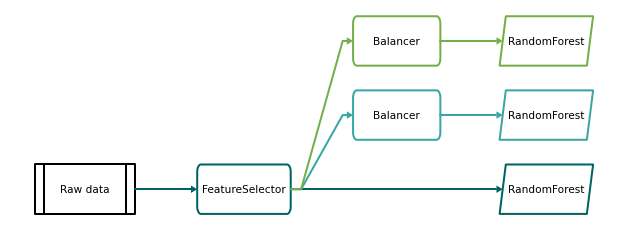

In [17]:
# Visualize the complete pipeline
atom.plot_pipeline()

## Analyze the results

In [18]:
atom.evaluate()

accuracy  average_precision  balanced_accuracy      f1  jaccard  \
RF        0.952             0.6562             0.5556  0.2000   0.1111   
RF_os     0.956             0.6215             0.7672  0.5769   0.4054   
RF_us     0.509             0.3687             0.6706  0.1578   0.0857   

       matthews_corrcoef  precision  recall  roc_auc  
RF                0.3252      1.000  0.1111   0.9107  
RF_os             0.5542      0.600  0.5556   0.9251  
RF_us             0.1545      0.087  0.8519   0.8258

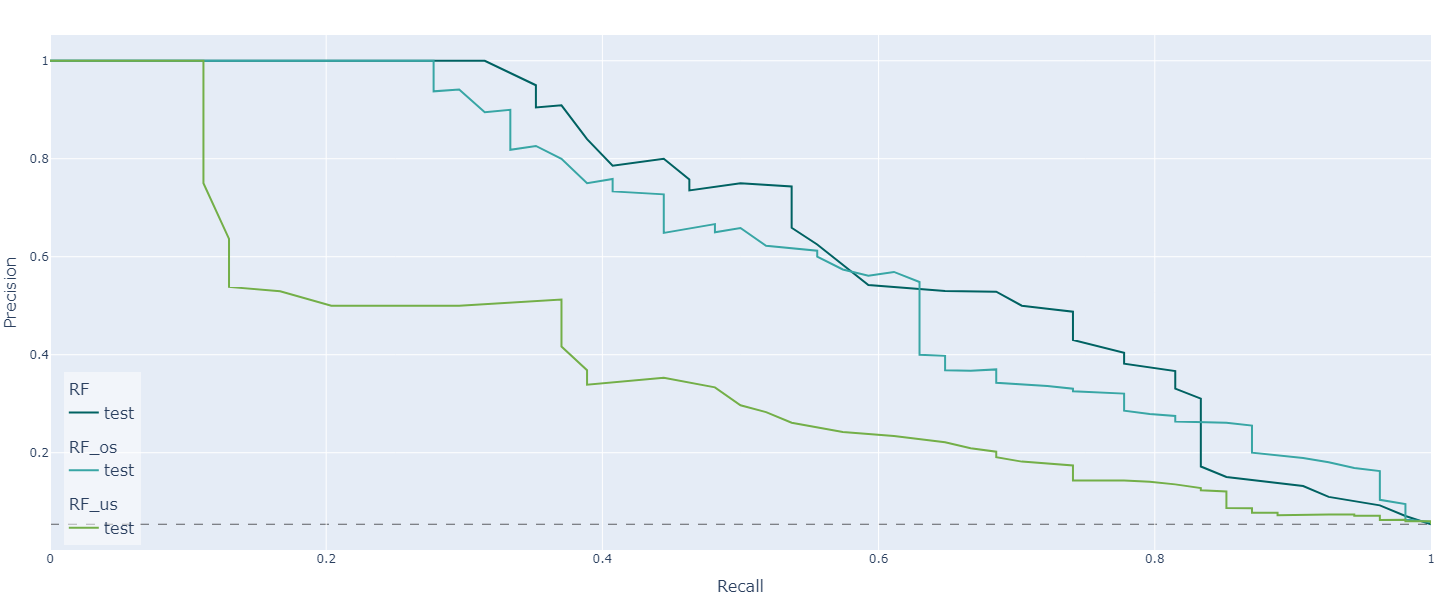

In [19]:
atom.plot_prc()

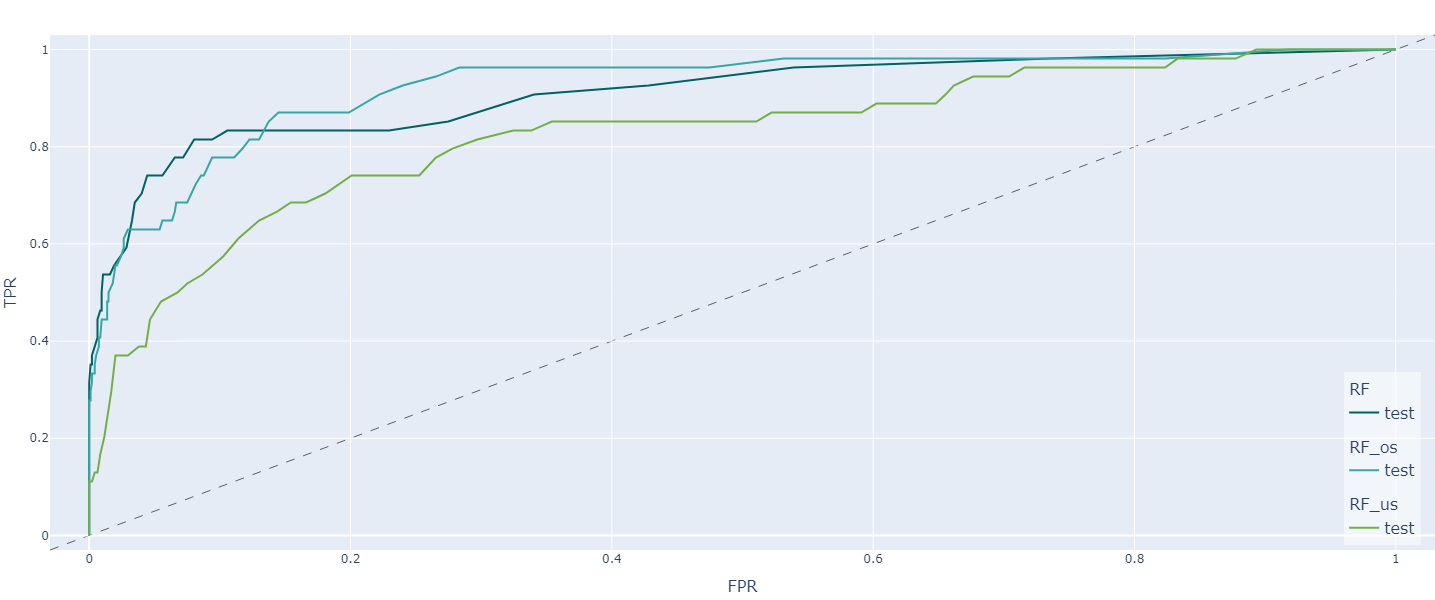

In [20]:
atom.plot_roc()
